$$\text{Applied Machine Learning in Python}$$
$$\text{Week 2}$$

* Classification models:
    * Logistic regression
    * Instance-based (non-parametric) learning: K-nearest neighbours
* Model evaluation
    * Confusion matrix
    * Accuracy
    * Precision / Recall
    * F1 score

$$\textbf{Classification models}$$

** Logistic regression ** is a classification model which assigns probability [0,1] of being in a 'positive' class (+1) to each instance in the data set. 
'Positive' class belongs to an event we would like to predict (class labels +1/-1 are arbitrary chosen). For example, given a data set of dogs and cats, we want to estimate the probability of a new instance to be a dog. Here, 'dog' represents the 'positive' class.

$$ logit( p(y=Y_1|x=\vec{X_i}) ) = w_0*X_{i0} + w_1*X_{i1} + w_2*X_{i2} + ...$$

where 

$$logit(p) = \log \frac{p}{1-p}$$

with $$ \vec{w} = [w_0, w_1, w_2, ....]\;\;\;\text{and}\;\;\;\vec{X_i} = [x_0, x_1, x_2, ...]$$ 

weights (parameters) of the logistic function   and values of the data (instance) points

Thus: $$ p(y=Y_1|x=\vec{X_i}) = \frac{1}{1 + e^{-(w_0*X_{i0} + w_1*X_{i1} + w_2*X_{i2} + ...)}}$$

Logistic regression is used when the outcomes (labels) are binary (only two classes). In the case of more than two outcomes, the **softmax function** is used.

Plotting logistic regression:

In [393]:
import numpy as np
import matplotlib.pyplot as plt

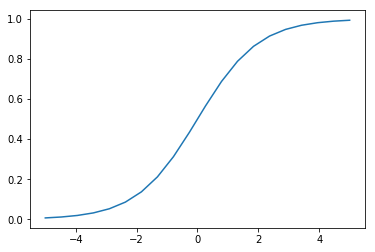

In [394]:
x = np.linspace(-5, 5, 20)
y = 1.0 / (1.0 + np.exp(-x))
plt.plot(x, y)
plt.show()

Toy-example:

In [399]:
# create 10 instances of 1Dim data with two (0/1) labels
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=10, n_features=1, centers=2,random_state=0)
print X
print y

[[  2.84382807e+00]
 [ -1.00780133e-03]
 [  1.92635850e+00]
 [  4.20056848e+00]
 [  1.95500806e+00]
 [  4.71438583e+00]
 [  5.75806083e+00]
 [  4.15243012e+00]
 [  3.21716328e+00]
 [  4.44783090e+00]]
[0 0 0 1 0 1 1 1 0 1]


In [400]:
# convert data to pandas dataframe
import pandas as pd
df_data = pd.DataFrame(data=X, columns={'feat_1'})
print df_data

     feat_1
0  2.843828
1 -0.001008
2  1.926358
3  4.200568
4  1.955008
5  4.714386
6  5.758061
7  4.152430
8  3.217163
9  4.447831


In [402]:
# adding the labels
df_data['lab'] = y
print df_data

     feat_1  lab
0  2.843828    0
1 -0.001008    0
2  1.926358    0
3  4.200568    1
4  1.955008    0
5  4.714386    1
6  5.758061    1
7  4.152430    1
8  3.217163    0
9  4.447831    1


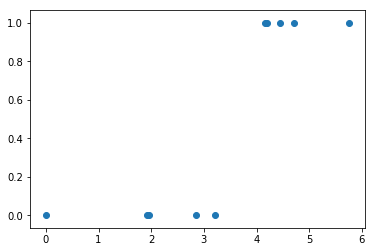

In [403]:
plt.scatter(df_data.feat_1, df_data.lab)
plt.show()

In [363]:
# fit logistic regression
from sklearn import linear_model
lr = linear_model.LogisticRegression()
lr.fit(df_data.feat_1.values.reshape((-1,1)), df_data.lab)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [405]:
# create new instances
feat_new = np.linspace(min(df_data.feat_1), max(df_data.feat_1), 10).reshape((-1,1))
# predict the outcome value for each new instance based on the trained model
y_pred = lr.predict(feat_new)

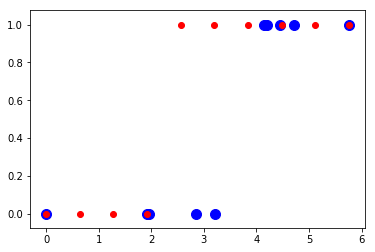

In [406]:
plt.scatter(df_data.feat_1, df_data.lab,c='b', s=100)
plt.plot(feat_new, y_pred,'ro')
plt.show()

**weights** of the fitted logistic function

In [366]:
# w_0
lr.intercept_

array([-1.06675397])

In [367]:
# w_1
lr.coef_

array([[ 0.46381559]])

$$ p(y=1|x=x_i) = \frac{1}{1 + e^{-(-1.067 + 0.464*x_i)}}$$

$$ p(y=0|x=x_i) = 1 - p(y=1|x=x_i) = \frac{e^{-(-1.067 + 0.464*x_i)}}{1 + e^{-(-1.067 + 0.464*x_i)}}  $$

**Logistic output** (probabilities)

In [409]:
# create a dataframe with instances and corresponding probabilites
df_new_data = pd.DataFrame(data=feat_new, columns={'feat_new'})
df_new_data = pd.concat((df_new_data,  pd.DataFrame(data=lr.predict_proba(feat_new), columns={'pr_class_0', 'pr_class_1'})),axis=1)
df_new_data['threshold'] = 0.7
df_new_data['predicted_class'] = (df_new_data.pr_class_1 > df_new_data.threshold).astype(int)
print df_new_data

   feat_new  pr_class_0  pr_class_1  threshold  predicted_class
0 -0.001008    0.744068    0.255932        0.7                0
1  0.638889    0.683613    0.316387        0.7                0
2  1.278785    0.616243    0.383757        0.7                0
3  1.918682    0.544095    0.455905        0.7                0
4  2.558578    0.470047    0.529953        0.7                0
5  3.198475    0.397295    0.602705        0.7                0
6  3.838371    0.328817    0.671183        0.7                0
7  4.478268    0.266914    0.733086        0.7                1
8  5.118164    0.212967    0.787033        0.7                1
9  5.758061    0.167434    0.832566        0.7                1


** Default Threshold = 0.5 **

$$\textbf{Non-parametric classification model: k-nearest neighbours (kNN)}\;\;\;\; \text{(lazzy learning)}$$

In **kNN** classification, the output is a class membership. An object is classified by a **majority vote of its neighbours**, with the object being assigned to the class most common among its **k nearest neighbours** (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbours.

<img src="plots/kNN_plot_1.png"  align="center" style="width: 1200px;"/>

<img src="plots/kNN_plot_6.png"  align="center" style="width: 1200px;"/>

In [369]:
# importing neighbour algorithm
from sklearn import neighbors
# defining the model with only 1 neighbour
knn_1_clf = neighbors.KNeighborsClassifier(n_neighbors=1)
# defining the model with 6 neighbour
knn_6_clf = neighbors.KNeighborsClassifier(n_neighbors=6)
# defining the model with 20 neighbour
knn_20_clf = neighbors.KNeighborsClassifier(n_neighbors=20)
# defining the model with 40 neighbour
knn_40_clf = neighbors.KNeighborsClassifier(n_neighbors=40)
# defining logistic regression for comparison
lr_clf = linear_model.LogisticRegression()

In [415]:
# loading iris data set
iris_data = datasets.load_iris()
X, y = iris_data.data, iris_data.target

In [371]:
# loading train_test splitter
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X[:,:2],y)

In [372]:
# train three classification models
knn_1_clf.fit(X_train, y_train)
knn_6_clf.fit(X_train, y_train)
knn_20_clf.fit(X_train, y_train)
knn_40_clf.fit(X_train, y_train)
# use ';' to suppres output
lr_clf.fit(X_train, y_train);

In [373]:
# use plotting function fom week_1
def plot_decision_regions_new(X, y, classifier, resolution=0.05, test_flag=False, indx=None):
    from matplotlib.colors import ListedColormap
    # setup marker generator and color map
    markers = ('s', '^', 'o', '+', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    if test_flag:
        face_colors = ('none','none','none','none','none')
        marker_size = 100
        markers = ('o', 'o', 'o', 'o', 'o')
        line_with = 2.0
    else:
        face_colors = colors
        marker_size = 50
        line_with = 0.5

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, edgecolors=cmap(idx),
                    marker=markers[idx], facecolors=face_colors[idx], label=cl, s=marker_size, linewidth=line_with)
    plt.show()

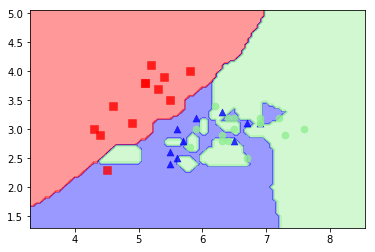

In [374]:
plot_decision_regions_new(X_test, y_test, knn_1_clf)

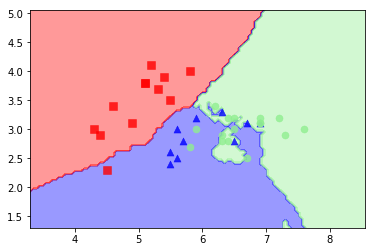

In [375]:
plot_decision_regions_new(X_test, y_test, knn_6_clf)

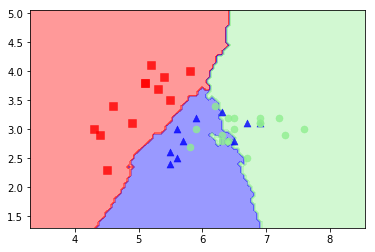

In [376]:
plot_decision_regions_new(X_test, y_test, knn_20_clf)

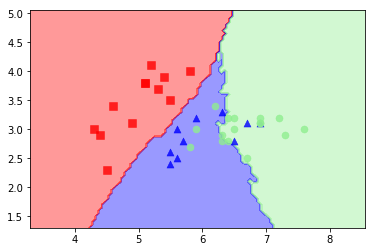

In [377]:
plot_decision_regions_new(X_test, y_test, knn_40_clf)

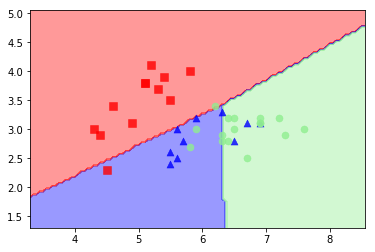

In [378]:
plot_decision_regions_new(X_test, y_test, lr_clf)

$$\textbf{Model evaluation}$$

$$\text{quantifying the quality of predictions} $$

Learning the parameters of a prediction function and testing it on the same data is **a methodological mistake**: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set **X_test, y_test**.

We can control the fraction of splitting (**test_size** parameter)


In [411]:
# split 60% for training and 40% to test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=0)

In [412]:
# Full data set
X.shape

(10, 1)

In [413]:
# Training set
X_train.shape

(5, 1)

In [382]:
# Test set
X_test.shape

(60, 4)

**Classification scoring metrics**
* Confusion matrix
* Accuracy
* Precision / Recall
* F1 score 

The diagonal elements of a **confusion matrix** represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

In [420]:
# performance of the logistic classifier on iris data set
# import metrics module
from sklearn import metrics
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4)
lr_clf = linear_model.LogisticRegression(scoring=)
lr_clf.fit(X_train, y_train)
y_pred_iris = lr_clf.predict(X_test)
conf_matrx = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_iris)
conf_matrx

TypeError: __init__() got an unexpected keyword argument 'scoring'

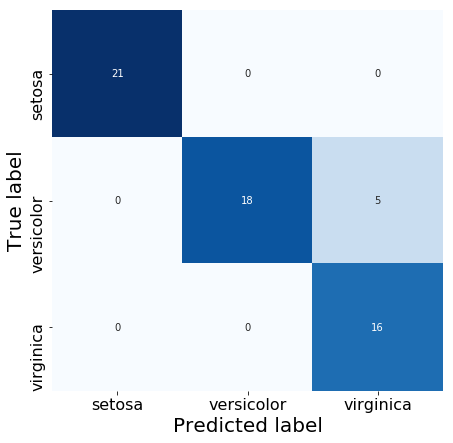

In [384]:
# plotting beautiful graphics with seaborn
import seaborn as sns
plt.figure(figsize=(7,7))
sns.heatmap(conf_matrx, cmap='Blues', annot=True, cbar=False)
plt.xticks([0.5,1.5,2.5], iris_data.target_names, fontsize=16)
plt.yticks([0.5,1.5,2.5], iris_data.target_names, fontsize=16)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

<img src="plots/conf_matrix_with_eq.png"  align="center" style="width: 1300px;"/>

<img src="plots/conf_matrix_examp.png"  align="center" style="width: 900px;"/>

In [385]:
# toy example as in above
y_true_results = np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,1.,1.,1.,1.,1.,1.,1.,1.])
# prediction of some fictitious classifier
y_pred_results = np.array([0.,0.,0.,1.,0.,1.,0.,0.,1.,0.,0.,0.,1.,1.,0.,1.,1.,1.,0.,1.])

In [421]:
# import metrics
from sklearn import metrics
# confusion matrix
metrics.confusion_matrix(y_true=y_true_results, y_pred=y_pred_results)

array([[9, 3],
       [2, 6]])

In [387]:
# accuracy matrix
metrics.accuracy_score(y_true=y_true_results, y_pred=y_pred_results)

0.75

In [388]:
# precision score
metrics.precision_score(y_true=y_true_results, y_pred=y_pred_results)

0.66666666666666663

In [389]:
# recall score
metrics.recall_score(y_true=y_true_results, y_pred=y_pred_results)

0.75

In [390]:
# f1 score
metrics.f1_score(y_true=y_true_results, y_pred=y_pred_results)

0.70588235294117652